# Tugas 4-6

## Sentiment Analysis

In [6]:
import pandas as pd
from textblob import TextBlob

In [2]:
dt_df = pd.read_csv('IMDB_Dataset.csv')
dt_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [3]:
dt_df['polarity'] = dt_df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
dt_df['subjectivity'] = dt_df['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
dt_df

,review,sentiment,polarity,subjectivity
0,One of the other reviewers has mentioned that ...,positive,0.023433,0.490369
1,A wonderful little production. <br /><br />The...,positive,0.109722,0.559343
2,I thought this was a wonderful way to spend ti...,positive,0.354008,0.658730
3,Basically there's a family where a little boy ...,negative,-0.057813,0.454167
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.217952,0.452916
5,"Probably my all-time favorite movie, a story o...",positive,0.155294,0.570392
6,I sure would like to see a resurrection of a u...,positive,0.285522,0.475196
7,"This show was an amazing, fresh & innovative i...",negative,0.082716,0.587654
8,Encouraged by the positive comments about this...,negative,-0.142863,0.754147
9,If you like original gut wrenching laughter yo...,positive,0.415000,0.550000


In [13]:
import matplotlib.pyplot as plt

dt_df.index = ['text'+str(i+1) for i in range(len(dt_df.index))]
dt_df['names'] = ['text'+str(i+1) for i in range(len(dt_df.index))]
dt_df


,review,sentiment,polarity,subjectivity,names
text1,One of the other reviewers has mentioned that ...,positive,0.023433,0.490369,text1
text2,A wonderful little production. <br /><br />The...,positive,0.109722,0.559343,text2
text3,I thought this was a wonderful way to spend ti...,positive,0.354008,0.658730,text3
text4,Basically there's a family where a little boy ...,negative,-0.057813,0.454167,text4
text5,"Petter Mattei's ""Love in the Time of Money"" is...",positive,0.217952,0.452916,text5
text6,"Probably my all-time favorite movie, a story o...",positive,0.155294,0.570392,text6
text7,I sure would like to see a resurrection of a u...,positive,0.285522,0.475196,text7
text8,"This show was an amazing, fresh & innovative i...",negative,0.082716,0.587654,text8
text9,Encouraged by the positive comments about this...,negative,-0.142863,0.754147,text9
text10,If you like original gut wrenching laughter yo...,positive,0.415000,0.550000,text10


C:\Users\Asus\AppData\Local\Temp\ipykernel_17676\2046841948.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001,y+.001,dt_df['names'][index], fontsize= 10)


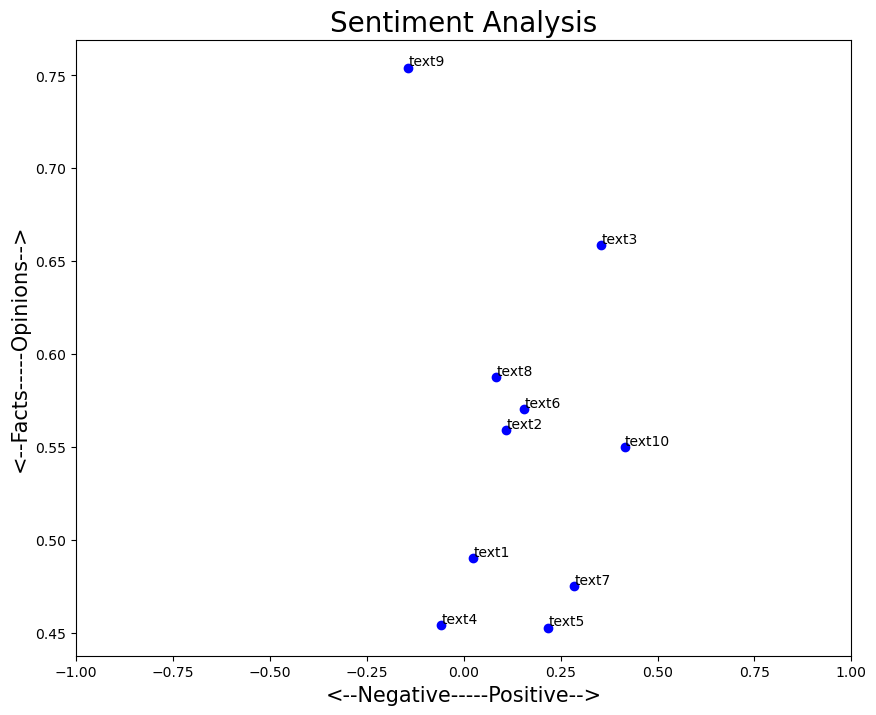

In [15]:
plt.rcParams['figure.figsize']=[10,8]

for index,text in enumerate(dt_df.index):
    x = dt_df.polarity.loc[text]
    y = dt_df.subjectivity.loc[text]
    plt.scatter(x,y, color='blue')
    plt.text(x+.001,y+.001,dt_df['names'][index], fontsize= 10)
    plt.xlim(-1,1)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<--Negative-----Positive-->', fontsize=15)
plt.ylabel('<--Facts-----Opinions-->', fontsize=15)

plt.show()

In [16]:
import numpy as np
import math

def split_text(text, n=10):
    l_text = len(text)
    size = math.floor(l_text/n)
    start = np.arange(0,l_text,size)
    
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [17]:
list_piece = []

for t in dt_df['review']:
    list_piece.append(split_text(t))
    
list_piece

[["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first ",
  'thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or t',
  'imid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname giv',
  'en to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inw',
  'ards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodg',
  "y dealings and shady agreements are never far away.<br /><br />I would say the main app

In [18]:
polarity_transcript = []

for lp in list_piece:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.16517857142857142,
  -0.10714285714285715,
  0.16666666666666666,
  0.13333333333333333,
  -0.04,
  -0.07666666666666666,
  -0.16875,
  0.192,
  -0.0625,
  -0.04999999999999999],
 [0.303125,
  0.0,
  -0.06944444444444443,
  -0.04722222222222222,
  0.09999999999999999,
  0.9,
  0.0062500000000000056,
  0.0,
  0.16666666666666666,
  -0.28611111111111115],
 [0.625, 0.0, 0.5, -0.75, 0.5, 0.6, 1.0, 0.19603174603174603, 0.1, 0.6],
 [-0.1875, 0.0, 0.0, 0.25, 0.0, 0.2, -0.1875, 0.0, -0.5, 0.0],
 [0.24500000000000002,
  0.15,
  0.0,
  0.04545454545454545,
  0.20833333333333334,
  0.21818181818181817,
  0.21875,
  0.3333333333333333,
  0.7,
  0.3833333333333333],
 [0.5, 0.35, 0.1, 0.25, -0.26, 0.5, 0.25, 0.16666666666666666, 0.55, -0.5],
 [0.5,
  0.0,
  -0.08333333333333333,
  0.13636363636363635,
  0.0,
  0.5,
  0.5,
  0.55,
  0.0,
  0.0],
 [0.3333333333333333,
  0.9,
  0.03749999999999999,
  0.1,
  -0.2999999999999999,
  -0.2916666666666667,
  0.1875,
  0.13333333333333333,
  0.375,
  -0.0

C:\Users\Asus\AppData\Local\Temp\ipykernel_17676\2359895608.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(dt_df['names'][index])


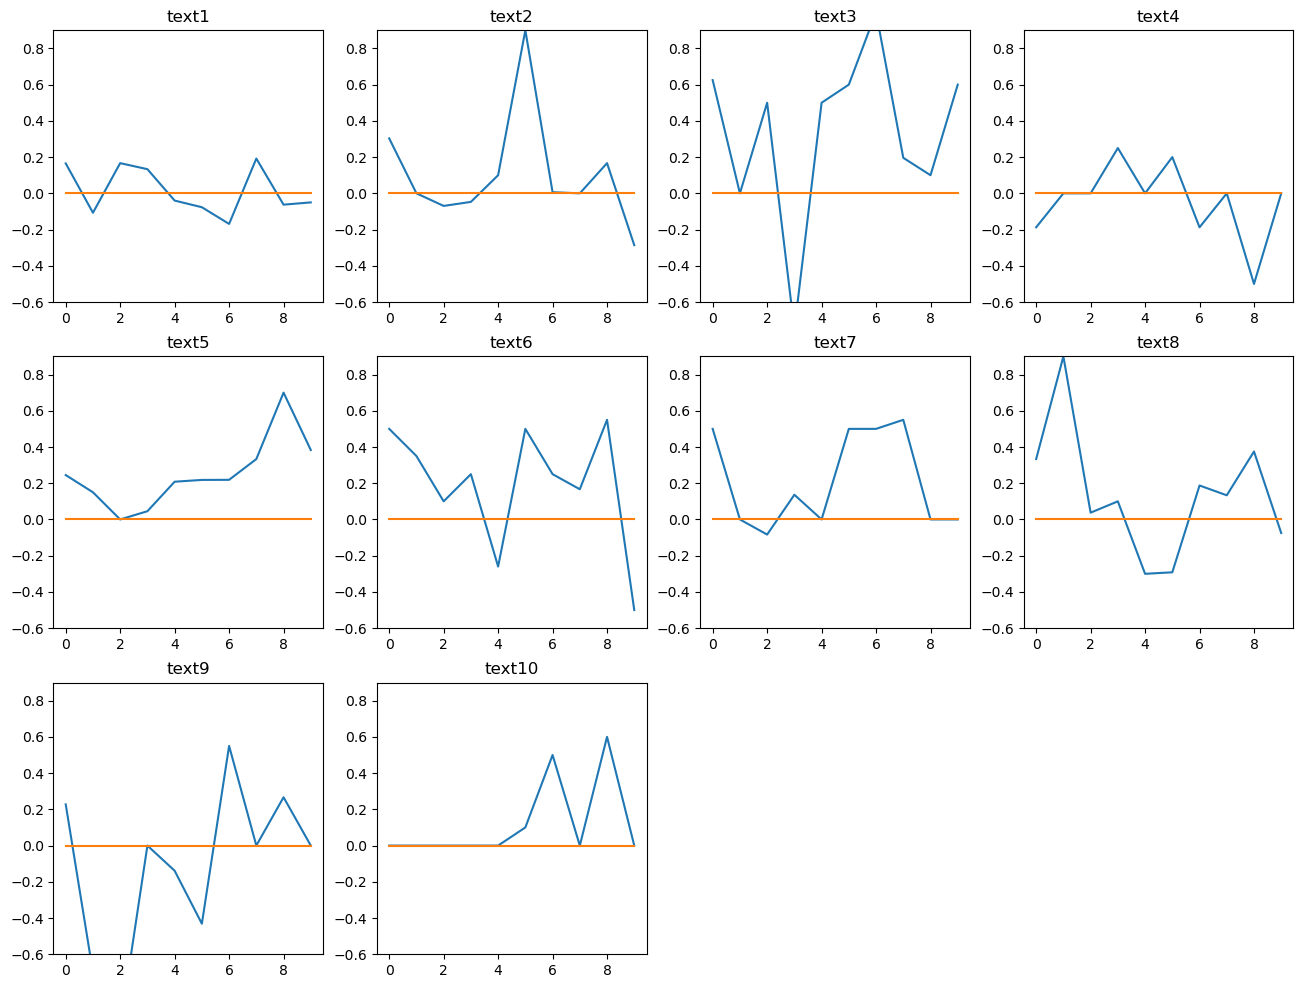

In [22]:
plt.rcParams['figure.figsize']=[16,12]

for index,text in enumerate(dt_df.index):
    plt.subplot(3,4,index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10),np.zeros(10))
    plt.title(dt_df['names'][index])
    plt.ylim(ymin=-.6,ymax=.9)
    
plt.show()

### Dari grafik polaritas diatas dapat diketahui bahwa text3, text6,dan text 9 hampir memiliki kesamaan polaritas. Saya juga menemukan bahwa seiring berjalannya proses maka tingkayt polaritas dari text tersebut akan mengalami penurunan dan peningkatan sesuai dengan sifat dari kalimat didalam teks tersebut

# Topic Modeling

In [23]:
dt = pd.read_csv('topicmodelling.csv')
dt.index = [x for x in dt['TITLE']]
dt

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology
Reconstructing Subject-Specific Effect Maps,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0
Rotation Invariance Neural Network,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0
Spherical polyharmonics and Poisson kernels for polyharmonic functions,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0
A finite element approximation for the stochastic Maxwell--Landau--Lifshitz--Gilbert system,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0
Comparative study of Discrete Wavelet Transforms and Wavelet Tensor Train decomposition to feature extraction of FTIR data of medicinal plants,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0
On maximizing the fundamental frequency of the complement of an obstacle,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0
On the rotation period and shape of the hyperbolic asteroid 1I/`Oumuamua (2017) U1 from its lightcurve,7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,0,1,0,0,0
Adverse effects of polymer coating on heat transport at solid-liquid interface,8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,0,1,0,0,0
"SPH calculations of Mars-scale collisions: the role of the Equation of State, material rheologies, and numerical effects",9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...,0,1,0,0,0
$\mathcal{R}_{0}$ fails to predict the outbreak potential in the presence of natural-boosting immunity,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1


In [24]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [25]:
dt_n = pd.DataFrame(dt.ABSTRACT.apply(nouns))
dt_n

,ABSTRACT
Reconstructing Subject-Specific Effect Maps,models inference disease alterations data subj...
Rotation Invariance Neural Network,Rotation invariance translation invariance val...
Spherical polyharmonics and Poisson kernels for polyharmonic functions,notion polyharmonics generalisation harmonics ...
A finite element approximation for the stochastic Maxwell--Landau--Lifshitz--Gilbert system,Landau Lifshitz Gilbert LLG equation Maxwell e...
Comparative study of Discrete Wavelet Transforms and Wavelet Tensor Train decomposition to feature extraction of FTIR data of medicinal plants,FTIR spectra samples plant species influence p...
On maximizing the fundamental frequency of the complement of an obstacle,\subset \mathbb R ^n domain asymmetry conditio...
On the rotation period and shape of the hyperbolic asteroid 1I/`Oumuamua (2017) U1 from its lightcurve,planet Oumuamua U1 October Lowell Observatory ...
Adverse effects of polymer coating on heat transport at solid-liquid interface,ability nanoparticles heat environment exposur...
"SPH calculations of Mars-scale collisions: the role of the Equation of State, material rheologies, and numerical effects",\approx impacts planet Smoothed Particle Hydro...
$\mathcal{R}_{0}$ fails to predict the outbreak potential in the presence of natural-boosting immunity,Time susceptibility host level immunity behavi...


In [28]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

stop_words_add = ['like','im','know','just','dont','thats','right','people','youre','got','gonna','time','think','yeah','said']
stop_words = list(text.ENGLISH_STOP_WORDS.union(stop_words_add))

cvn = CountVectorizer(stop_words=stop_words)
dt_cvnn = cvn.fit_transform(dt_n.ABSTRACT)
dt_dtmm = pd.DataFrame(dt_cvnn.toarray(),columns=cvn.get_feature_names_out())
dt_dtmm.index = dt_n.index
dt_dtmm

,ability,account,accuracy,ad,addition,adni,algorithm,algorithms,alterations,alzheimer,...,variability,velocities,vortices,walls,water,wavelength,wavelet,work,wtt,yields
Reconstructing Subject-Specific Effect Maps,0,0,1,1,0,3,1,0,1,2,...,0,0,0,0,0,0,0,0,0,1
Rotation Invariance Neural Network,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spherical polyharmonics and Poisson kernels for polyharmonic functions,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A finite element approximation for the stochastic Maxwell--Landau--Lifshitz--Gilbert system,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
Comparative study of Discrete Wavelet Transforms and Wavelet Tensor Train decomposition to feature extraction of FTIR data of medicinal plants,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,0,3,0
On maximizing the fundamental frequency of the complement of an obstacle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
On the rotation period and shape of the hyperbolic asteroid 1I/`Oumuamua (2017) U1 from its lightcurve,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Adverse effects of polymer coating on heat transport at solid-liquid interface,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
"SPH calculations of Mars-scale collisions: the role of the Equation of State, material rheologies, and numerical effects",0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
$\mathcal{R}_{0}$ fails to predict the outbreak potential in the presence of natural-boosting immunity,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
import gensim
import scipy
from gensim import models
from gensim import interfaces,utils,matutils
from gensim.matutils import dirichlet_expectation, mean_absolute_difference
import scipy.sparse

corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(dt_dtmm.transpose()))

id2wordn = dict((v,k) for k,v in cvn.vocabulary_.items())

In [30]:
ldan = models.LdaModel(corpus=corpusn, num_topics=2,id2word=id2wordn,passes=10)
ldan.print_topics()

[(0,
  '0.024*"data" + 0.021*"lambda_1" + 0.015*"equation" + 0.015*"omega" + 0.015*"rsm" + 0.013*"condition" + 0.013*"functions" + 0.013*"poisson" + 0.012*"inference" + 0.012*"solutions"'),
 (1,
  '0.015*"material" + 0.013*"invariance" + 0.013*"rotation" + 0.013*"behavior" + 0.013*"classification" + 0.010*"polymer" + 0.010*"density" + 0.010*"model" + 0.010*"dynamics" + 0.010*"dwt"')]

In [31]:
ldan = models.LdaModel(corpus=corpusn, num_topics=3,id2word=id2wordn,passes=10)
ldan.print_topics()

[(0,
  '0.028*"data" + 0.016*"rsm" + 0.016*"material" + 0.013*"model" + 0.013*"disease" + 0.013*"condition" + 0.013*"inference" + 0.010*"polymer" + 0.010*"dynamics" + 0.010*"behavior"'),
 (1,
  '0.024*"functions" + 0.024*"poisson" + 0.019*"dwt" + 0.019*"wtt" + 0.019*"processing" + 0.019*"kernels" + 0.019*"polyharmonics" + 0.013*"data" + 0.013*"classification" + 0.013*"balls"'),
 (2,
  '0.035*"lambda_1" + 0.026*"equation" + 0.025*"omega" + 0.021*"invariance" + 0.021*"solutions" + 0.016*"domain" + 0.016*"setminus" + 0.016*"phi_" + 0.011*"rotation" + 0.011*"terms"')]

In [32]:
ldan = models.LdaModel(corpus=corpusn, num_topics=4,id2word=id2wordn,passes=10)
ldan.print_topics()

[(0,
  '0.036*"material" + 0.023*"model" + 0.016*"behavior" + 0.016*"dynamics" + 0.016*"classification" + 0.016*"immunity" + 0.016*"transmission" + 0.016*"susceptibility" + 0.016*"host" + 0.016*"epidemics"'),
 (1,
  '0.024*"polymer" + 0.017*"hr" + 0.017*"lightcurve" + 0.017*"density" + 0.017*"exposure" + 0.017*"transport" + 0.017*"heat" + 0.017*"liquid" + 0.009*"planet" + 0.009*"rotation"'),
 (2,
  '0.041*"data" + 0.026*"rsm" + 0.021*"solutions" + 0.021*"inference" + 0.016*"equation" + 0.016*"subject" + 0.016*"disease" + 0.016*"condition" + 0.016*"detections" + 0.016*"models"'),
 (3,
  '0.031*"lambda_1" + 0.022*"omega" + 0.018*"poisson" + 0.018*"functions" + 0.018*"invariance" + 0.014*"polyharmonics" + 0.014*"kernels" + 0.014*"balls" + 0.014*"terms" + 0.014*"processing"')]

In [33]:
ldan = models.LdaModel(corpus=corpusn, num_topics=5,id2word=id2wordn,passes=10)
ldan.print_topics()

[(0,
  '0.025*"solutions" + 0.025*"invariance" + 0.019*"equation" + 0.019*"wtt" + 0.019*"dwt" + 0.019*"processing" + 0.013*"data" + 0.013*"results" + 0.013*"llg" + 0.013*"mllg"'),
 (1,
  '0.032*"material" + 0.026*"poisson" + 0.026*"functions" + 0.020*"kernels" + 0.020*"polyharmonics" + 0.014*"rotation" + 0.014*"state" + 0.014*"strength" + 0.014*"planet" + 0.014*"temperature"'),
 (2,
  '0.042*"data" + 0.024*"rsm" + 0.019*"model" + 0.019*"condition" + 0.019*"disease" + 0.019*"inference" + 0.015*"behavior" + 0.015*"dynamics" + 0.015*"polymer" + 0.014*"adni"'),
 (3,
  '0.066*"lambda_1" + 0.047*"omega" + 0.029*"phi_" + 0.029*"setminus" + 0.020*"domain" + 0.020*"equation" + 0.020*"points" + 0.020*"set" + 0.020*"dirichlet" + 0.020*"point"'),
 (4,
  '0.004*"data" + 0.004*"functions" + 0.004*"rsm" + 0.004*"classifiers" + 0.004*"inference" + 0.004*"poisson" + 0.004*"polyharmonics" + 0.004*"adni" + 0.004*"models" + 0.004*"detections"')]

In [34]:
ldan = models.LdaModel(corpus=corpusn, num_topics=4,id2word=id2wordn,passes=80)
ldan.print_topics()

[(0,
  '0.023*"solutions" + 0.017*"equation" + 0.017*"dwt" + 0.017*"processing" + 0.017*"wtt" + 0.012*"results" + 0.012*"spectra" + 0.012*"extraction" + 0.012*"ftir" + 0.012*"wavelet"'),
 (1,
  '0.028*"data" + 0.024*"lambda_1" + 0.018*"rsm" + 0.018*"omega" + 0.018*"material" + 0.014*"condition" + 0.014*"inference" + 0.014*"state" + 0.014*"terms" + 0.014*"poisson"'),
 (2,
  '0.032*"invariance" + 0.025*"model" + 0.017*"rotation" + 0.017*"behavior" + 0.017*"dynamics" + 0.017*"classification" + 0.017*"immunity" + 0.017*"solution" + 0.017*"epidemics" + 0.017*"susceptibility"'),
 (3,
  '0.032*"polymer" + 0.023*"density" + 0.022*"liquid" + 0.022*"transport" + 0.022*"heat" + 0.013*"properties" + 0.013*"domain" + 0.013*"exposure" + 0.013*"layer" + 0.013*"results"')]

In [35]:
corpus_tranformed = ldan[corpusn]
list(zip([(a,b) for [(a,b)] in corpus_tranformed], dt_dtmm.index))

[((1, 0.9923702), 'Reconstructing Subject-Specific Effect Maps'),
 ((2, 0.9740349), 'Rotation Invariance Neural Network'),
 ((1, 0.97914016),
  'Spherical polyharmonics and Poisson kernels for polyharmonic functions'),
 ((0, 0.9790444),
  'A finite element approximation for the stochastic Maxwell--Landau--Lifshitz--Gilbert system'),
 ((0, 0.9854465),
  'Comparative study of Discrete Wavelet Transforms and Wavelet Tensor Train decomposition to feature extraction of FTIR data of medicinal plants'),
 ((1, 0.98654354),
  'On maximizing the fundamental frequency of the complement of an obstacle'),
 ((0, 0.9771229),
  'On the rotation period and shape of the hyperbolic asteroid 1I/`Oumuamua (2017) U1 from its lightcurve'),
 ((3, 0.97713053),
  'Adverse effects of polymer coating on heat transport at solid-liquid interface'),
 ((1, 0.98143923),
  'SPH calculations of Mars-scale collisions: the role of the Equation of State, material rheologies, and numerical effects'),
 ((2, 0.9795457),
  '$\

# Text Generating

In [7]:
data = open('game_of_thrones.txt').read()
data_df = pd.DataFrame({'game_of_thrones': data},index=[0]).transpose()
data_df.columns = ['transcript']
data_df['full_name'] = ['Game of Thrones']
data_df


,transcript,full_name
game_of_thrones,"We should start back, Gared urged as the woods...",Game of Thrones


In [8]:
import re
import string

def clean_dt_r1(text):
    text = text.lower()
    text = re.sub('\[_*?\]',' ',text)
    text = re.sub('\(_*?\)',' ',text)
    text = re.sub('[%s]'% re.escape(string.punctuation),' ',text)
    text = re.sub('\w*\d\w*',' ',text)
    return text

<>:6: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\('
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\('
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Asus\AppData\Local\Temp\ipykernel_19248\4285380472.py:6: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[_*?\]',' ',text)
C:\Users\Asus\AppData\Local\Temp\ipykernel_19248\4285380472.py:7: SyntaxWarning: invalid escape sequence '\('
  text = re.sub('\(_*?\)',' ',text)
C:\Users\Asus\AppData\Local\Temp\ipykernel_19248\4285380472.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*',' ',text)


In [9]:
data_clean = pd.DataFrame(data_df.transcript.apply(lambda x: clean_dt_r1(x)))
data_clean

,transcript
game_of_thrones,we should start back gared urged as the woods...


In [10]:
def clean_dt_r2(text):
    text = text.lower()
    text = re.sub('[''""_♪♪]',' ',text)
    text = re.sub('\n',' ',text)
    text = re.sub('\xa0',' ',text)
    text = re.sub(' ',' ',text)
    return text

In [11]:
data_clean = pd.DataFrame(data_clean.transcript.apply(lambda x: clean_dt_r2(x)))
data_clean

,transcript
game_of_thrones,we should start back gared urged as the woods...


In [12]:
got_text = data_clean.transcript.loc['game_of_thrones']
got_text

'we should start back  gared urged as the woods began to grow dark around them   the wildlings are dead   do the dead frighten you  ser waymar royce asked with just the hint of a smile   gared did not rise to the bait  he was an old man  past fifty  and he had seen the lordlings come and go   dead is dead  he said   we have no business with the dead   are they dead  royce asked softly   what proof have we   will saw them  gared said   if he says they are dead  that s proof enough for me   will had known they would drag him into the quarrel sooner or later  he wished it had been later rather than sooner   my mother told me that dead men sing no songs  he put in   my wet nurse said the same thing  will  royce replied   never believe anything you hear at a woman s tit  there are things to be learned even from the dead  his voice echoed  too loud in the twilit forest   we have a long ride before us  gared pointed out   eight days  maybe nine  and night is falling   ser waymar royce glanced

In [13]:
from collections import defaultdict

def markov_chain(text):
    words = text.split(' ')
    m_dict = defaultdict(list)
    for current_word, next_word in zip(words[0:-1],words[1:]):
        m_dict[current_word].append(next_word)
    m_dict = dict(m_dict)
    return m_dict
    

In [14]:
got_dict = markov_chain(got_text)
got_dict

{'we': ['should',
  'have',
  '',
  'have',
  'should',
  'did',
  'could',
  'can',
  'found',
  'll',
  've',
  'can',
  'need',
  'want',
  'will'],
 'should': ['start', 'track'],
 'start': ['back'],
 'back': ['', '', '', 'to', 'his', 'and', 'to', 'over', 'a', 'again'],
 '': ['gared',
  '',
  'the',
  '',
  'do',
  'ser',
  '',
  'gared',
  'he',
  'past',
  'and',
  '',
  'dead',
  'he',
  '',
  'we',
  '',
  'are',
  'royce',
  '',
  'what',
  '',
  'will',
  'gared',
  '',
  'if',
  'that',
  '',
  'will',
  'he',
  '',
  'my',
  'he',
  '',
  'my',
  'will',
  'royce',
  '',
  'never',
  'there',
  'his',
  'too',
  '',
  'we',
  'gared',
  '',
  'eight',
  'maybe',
  'and',
  '',
  'ser',
  '',
  'it',
  'are',
  'gared',
  '',
  'will',
  'the',
  'gared',
  'man',
  'and',
  'yet',
  'under',
  'will',
  'you',
  'a',
  '',
  'will',
  'he',
  'the',
  'all',
  'and',
  'he',
  'he',
  'and',
  '',
  'until',
  'something',
  'there',
  'nine',
  'north',
  'farther',
  'hard

In [15]:
import random

def generate_sentences(chain, count=16):
    word1 = random.choice(list(chain.keys()))
    sentences = word1.capitalize()
    
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentences +=  ' ' + word2
        
    sentences += '.'
    return(sentences)


In [16]:
for i in range(1,11):
    print (f'teks{[i]}: {generate_sentences(got_dict)}')

teks[1]: Glitter in a cruel piece of a disdainful smile  the watchers stood there  .
teks[2]: Groped for it  the challenge   they had been sent beyond  while .
teks[3]: Ring of the day had caught him bravely  there s ringmail  gared still .
teks[4]: Jewels glittered in the edge on the best go out  but will  but that.
teks[5]: Own bucks  the shining steel shattered  gared urged as he tied the wall was.
teks[6]: Moleskin glove came shivering  a bird  and turned away  will   did.
teks[7]: Mouth  ser waymar royce stood over that  i am not come before us .
teks[8]: North again  we have killed these men for me  untouched  then  .
teks[9]: Groped for the wind was right through the trunk of the deepening twilight in the blades.
teks[10]: Details  there  he had caught him  the woods gave answer   nine.
